In [199]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import os
import sys
sys.path.append("..")
import gym
import pickle
import numpy as np
import pandas as pd
import gym_Toribash
import matplotlib.pyplot as plt



from gym import spaces
from time import sleep
from scipy import stats
from torille import ToribashControl
from torille import constants
from hmmlearn import hmm
from itertools import product
from utils.tools import *
from stable_baselines import PPO1
from utils.stochastic_measure import stochastic_measure
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

plt.style.use("fivethirtyeight")

In [141]:
ENV_DICT = "../models/tight_range_continuous_actions_configs_dict.pkl"
MODEL = "../models/tight_range_continuous_actions.pkl"
with open(ENV_DICT, 'rb') as f:
    env_dict = pickle.load(f)
env_id = env_dict['env_name']
env = gym.make(env_id)
env.init(**env_dict)
model = PPO1.load(MODEL)
env.set_draw_game(True)
obs = env.reset()

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [142]:
game_info = []
for n_games in range(50):
    sleep(1)
    eps_info = []
    for _ in range(50): # number of games = steps//50 i.e. 150//50 is 3 games
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        eps_info.append(obs)
        if(dones):
            obs = env.reset()
    game_info.append(eps_info)
env.close()
states = np.array(game_info).astype(np.float32)

In [177]:
df1 = load_csv("../data/player1_state_info.csv")
df2 = load_csv("../data/player2_state_info.csv")
p1 = df1.drop(columns=['Unnamed: 0', 'match', 'turn'])
p2 = df2.drop(columns=['Unnamed: 0', 'match', 'turn'])

In [181]:
experts = np.concatenate((p1,p2), axis=1)
pca = PCA(28, whiten=True)
pca.fit(experts)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [182]:
obs = pca.transform(experts)

In [183]:
print(np.max(obs))
print(np.min(obs))

8.656189682795493
-7.404335777141228


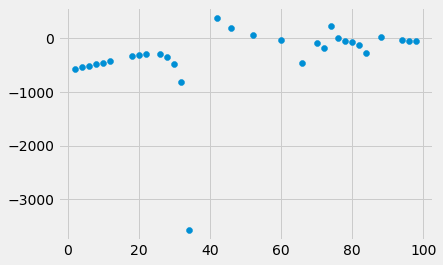

In [191]:
scores = []
generated = np.concatenate([eps for eps in states])
for n in np.arange(2,100,2):
    pca = PCA(n, whiten=True)
    pca.fit(generated)
    scores.append(pca.score(generated))
plt.scatter(np.arange(2,100,2), scores)

In [197]:
print("Best score:",scores[np.argmax(scores)], " with n =", np.arange(2,100,2)[np.argmax(scores)])

Best score: 385.49026  with n = 42


In [208]:
metric, hmm, pca_matches = stochastic_measure(MODEL, ENV_DICT)

         1    -1727010.7613             +nan
         2    -1183475.1264     +543535.6350
         3     -993790.1633     +189684.9630
         4     -898175.1726      +95614.9907
         5     -870322.0031      +27853.1695
         6     -857050.1043      +13271.8988
         7     -847779.8715       +9270.2328
         8     -837451.8071      +10328.0645
         9     -823005.4606      +14446.3464
        10     -807194.5689      +15810.8917
        11     -793278.5168      +13916.0521
        12     -780192.6251      +13085.8917
        13     -765103.0487      +15089.5764
        14     -750576.2575      +14526.7912
        15     -740142.9617      +10433.2958
        16     -730570.2954       +9572.6662
        17     -724457.2416       +6113.0538
        18     -719753.6887       +4703.5529
        19     -716868.3120       +2885.3768
        20     -715390.6996       +1477.6124
        21     -714837.1126        +553.5870
        22     -714319.0380        +518.0746
        23

Loading a model without an environment, this model cannot be trained until it has a valid environment.


         1      -91145.9825             +nan
         2      -73874.3415      +17271.6410
         3      -59833.5842      +14040.7573
         4      -52816.1144       +7017.4698
         5      -51334.5868       +1481.5276
         6      -50699.6177        +634.9691
         7      -50107.6771        +591.9406
         8      -49886.8854        +220.7917
         9      -49803.7420         +83.1434
        10      -49747.7039         +56.0381
        11      -49690.1681         +57.5358
        12      -49613.4779         +76.6902
        13      -49559.9422         +53.5358
        14      -49530.8031         +29.1390
        15      -49492.9658         +37.8373
        16      -49462.7016         +30.2642
        17      -49426.1254         +36.5762
        18      -49364.9734         +61.1520
        19      -49271.6950         +93.2784
        20      -49108.8371        +162.8579
        21      -48586.5371        +522.3001
        22      -46988.0138       +1598.5233
        23

In [220]:
dict1 = "../models/discrete_weighted_30_reward_1_configs_dict.pkl"
model1 = "../models/discrete_weighted_30_reward_1.pkl"
dict2 = "../models/discrete_weighted_30_reward_2_configs_dict.pkl"
model2 = "../models/discrete_weighted_30_reward_2.pkl"
model1_scores = {}
model2_scores = {}
for d in np.arange(5,100,10):
    for h in np.arange(5,100,10):
        metric1, _, _ = stochastic_measure(model1, dict1, pca_dim=d, hmm_hidden_states=h, verbose=False)
        metric2, _, _ = stochastic_measure(model2, dict2, pca_dim=d, hmm_hidden_states=h, verbose=False)
        model1_scores[(d,h)] = metric1
        model2_scores[(d,h)] = metric2

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained unti

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Loading a model without an environment, this model cannot be trained until it has a valid environment.


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


timeout: timed out

In [221]:
env.close()

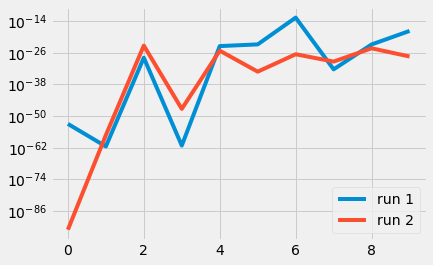

In [227]:
plt.semilogy(np.array([v for k,v in model1_scores.items()]), label='run 1')
plt.semilogy(np.array([v for k,v in model2_scores.items()]), label='run 2')
plt.legend()